# Binary Classification Neural Network – Step‑by‑Step Workflow

This notebook walks through a **tiny binary classification example** using TensorFlow / Keras.

We will:

1. **Import libraries** and set up the environment.  
2. **Create a small example dataset** with two input features (`x1`, `x2`) and one binary target label (`y`).  
3. **Build a simple neural network** with:
   - 1 hidden layer (2 ReLU neurons)  
   - 1 output neuron (sigmoid) for binary classification.  
4. **Manually set the initial weights and biases** so they match your worked‑out example.  
5. **Train the model for several epochs** and record the loss and accuracy after each epoch.  
6. **Visualise the loss curve** (Average Loss vs Epoch).  
7. **Inspect a single‑sample training step**, showing:
   - Prediction and loss **before** the update  
   - Prediction and loss **after** the update  
   - How much the loss improved  

> 💡 You can run the cells **top‑to‑bottom** to follow the full workflow.


## Setup and imports

In this step we:

- Import **TensorFlow / Keras** for building and training the neural network.  
- Import **NumPy** for numerical operations.  
- Import **Pandas** (later used to store the history as a DataFrame).

If TensorFlow is not installed in your environment, uncomment the `pip install` line and run the cell once.


In [8]:
# If TensorFlow is not installed, uncomment this line and run once:
# !pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

## 1. Create a tiny example dataset

Here we build a very small dataset with 10 rows.  
Each row has:

- `x1`, `x2` → two input features  
- `y` → the binary target label (0 or 1)

You can **replace these numbers with your own data** if you want to try a different example.


In [9]:
# Example dataset with 10 rows: [x1, x2, y]
# 👉 Replace these with your own data if you want
data = np.array([
    [0.5, 1.3, 0],
    [1.0, 0.5, 1],
    [1.5, 1.0, 1],
    [0.2, 0.1, 0],
    [2.0, 1.5, 1],
    [0.3, 1.8, 0],
    [1.2, 0.7, 1],
    [0.8, 1.1, 0],
    [1.7, 1.3, 1],
    [0.4, 0.9, 0],
])

X = data[:, :2]   # features: x1, x2
y = data[:, 2]    # labels: y

## 2. Build the neural network architecture

We define a simple `Sequential` model with:

- An **Input layer** for 2 features (`x1`, `x2`)  
- A **hidden Dense layer** with 2 neurons and ReLU activation  
- An **output Dense layer** with 1 neuron and sigmoid activation for binary classification

At this point we only define the **structure** of the model, not the training process.


In [10]:
model = keras.Sequential([
    layers.Input(shape=(2,)),                # x1, x2
    layers.Dense(2, activation='relu', name='hidden'),   # 2 ReLU neurons
    layers.Dense(1, activation='sigmoid', name='output') # 1 sigmoid neuron
])

## 3. Manually set initial weights and compile the model

In this step we:

1. Choose specific numeric values for the weights (`W1`–`W6`) and biases (`b0`, `b1`, `b2`).  
2. Put those into the hidden and output layer weight matrices.  
3. **Compile** the model with:
   - Optimizer: Stochastic Gradient Descent (`SGD`)  
   - Loss: Binary cross‑entropy  
   - Metric: Accuracy

This ensures the model starts from exactly the same parameters as your hand calculations.


In [11]:
# initial weights and biases
W1, W3, b1 = 0.1, 0.2, 0.01
W2, W4, b2 = -0.05, 0.02, -0.02
W5, W6, b0 = 0.12, -0.08, 0.02

# Build once (initialize)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set weights for hidden layer
hidden_layer = model.get_layer('hidden')
hidden_kernel = np.array([[W1, W2],
                          [W3, W4]], dtype=np.float32)
hidden_bias = np.array([b1, b2], dtype=np.float32)
hidden_layer.set_weights([hidden_kernel, hidden_bias])

# Set weights for output layer
output_layer = model.get_layer('output')
output_kernel = np.array([[W5],
                          [W6]], dtype=np.float32)
output_bias = np.array([b0], dtype=np.float32)
output_layer.set_weights([output_kernel, output_bias])

# Check shapes to be sure
for layer in model.layers:
    print(layer.name, [w.shape for w in layer.get_weights()])

hidden [(2, 2), (2,)]
output [(2, 1), (1,)]


## 4. Train the model and log loss & accuracy

Now we train the model for a chosen number of epochs.

Key points:

- `batch_size=1` → updates weights after **each row**, similar to online / stochastic gradient descent.  
- We store the **average loss** and **accuracy** for each epoch into a Pandas DataFrame.  
- The resulting `history_df` table lets you clearly see how the model improves over time.


In [12]:
num_epochs = 10

history = model.fit(
    X, y,
    epochs=num_epochs,
    batch_size=1,
    verbose=0
)

# Convert history to a DataFrame
history_df = pd.DataFrame({
    "Epoch": np.arange(1, num_epochs + 1),
    "Average Loss": history.history['loss'],
    "Accuracy": history.history['accuracy']
})

# Round for nicer display
history_df['Average Loss'] = history_df['Average Loss'].round(4)
history_df['Accuracy'] = (history_df['Accuracy'] * 100).round(1)

history_df

,Epoch,Average Loss,Accuracy
0,1,0.6921,50.0
1,2,0.6919,50.0
2,3,0.6918,50.0
3,4,0.6916,50.0
4,5,0.6914,50.0
5,6,0.6913,50.0
6,7,0.6911,50.0
7,8,0.6909,50.0
8,9,0.6907,50.0
9,10,0.6905,50.0


## 5. Plot Epoch vs Average Loss

Here we create a simple line plot to visualise how the **average loss** changes across epochs.

- The x‑axis shows the epoch number.  
- The y‑axis shows the average loss value for that epoch.

If training works correctly, you should typically see the loss **decrease** as epochs increase (at least at the beginning).


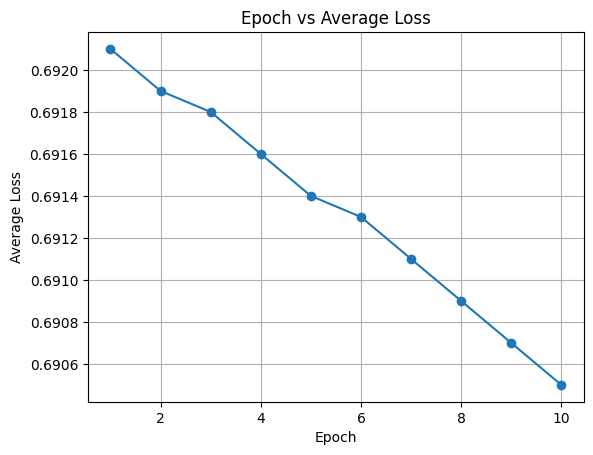

In [13]:
import matplotlib.pyplot as plt

# Extract data
epochs = history_df["Epoch"]
loss = history_df["Average Loss"]

# Create the plot
plt.figure()
plt.plot(epochs, loss, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Epoch vs Average Loss")
plt.grid(True)

plt.show()

## 6. Inspect a single‑sample training step (first 10 rows)

This final section is designed to mirror your **manual calculations** for the first epoch:

For each of the first 10 rows:

1. **Reset the weights** back to your original initial values.  
2. Take **one sample** (`x1`, `x2`, `y`).  
3. Do a **forward pass before training**:
   - Compute the predicted output \( \hat{y} \).  
   - Compute the binary cross‑entropy loss.  
4. Perform **one training step** using `model.train_on_batch`.  
5. Do a **forward pass after training** on the same sample.  
6. Print out:
   - Prediction and loss **before** training  
   - Prediction and loss **after** training  
   - The **loss improvement** (difference between before and after)

This helps you see exactly how **one gradient update** changes the prediction and loss for each row.


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

bce = keras.losses.BinaryCrossentropy()

hidden_kernel = np.array([[0.1, -0.05],
                          [0.2,  0.02]], dtype=np.float32)
hidden_bias   = np.array([0.01, -0.02], dtype=np.float32)

output_kernel = np.array([[0.12],
                          [-0.08]], dtype=np.float32)
output_bias   = np.array([0.02], dtype=np.float32)

model.get_layer('hidden').set_weights([hidden_kernel, hidden_bias])
model.get_layer('output').set_weights([output_kernel, output_bias])

print("Weights RESET to initial values\n")



print("========== FIRST EPOCH (First 10 Rows Only) ==========\n")

for i in range(10):   # only first 10 rows

    x_sample = X[i].reshape(1, -1)
    y_sample = y[i:i+1]

    print(f"--- Row {i+1} ---")
    print("Input (x1, x2):", x_sample)
    print("Target (y):", y_sample)

    # -------- FORWARD BEFORE TRAINING --------
    y_pred_before = model.predict(x_sample, verbose=0).reshape(-1)
    loss_before = bce(y_sample, y_pred_before).numpy()

    print("Forward BEFORE training (ŷ):", float(y_pred_before))
    print("Loss BEFORE training      :", float(loss_before))

    # -------- ONE TRAINING STEP --------
    model.train_on_batch(x_sample, y_sample)

    # -------- FORWARD AFTER TRAINING --------
    y_pred_after = model.predict(x_sample, verbose=0).reshape(-1)
    loss_after = bce(y_sample, y_pred_after).numpy()

    print("Forward AFTER training  (ŷ):", float(y_pred_after))
    print("Loss AFTER training       :", float(loss_after))

    print("Loss Improvement          :", float(loss_before - loss_after))
    print("-------------------------------------------\n")

Weights RESET to initial values

========== FIRST EPOCH (First 10 Rows Only) ==========

--- Row 1 ---
Input (x1, x2): [[0.5 1.3]]
Target (y): [0.]
Forward BEFORE training (ŷ): 0.5145958662033081
Loss BEFORE training      : 0.7227734923362732


/tmp/ipython-input-2142509054.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Forward BEFORE training (ŷ):", float(y_pred_before))
/tmp/ipython-input-2142509054.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Forward AFTER training  (ŷ):", float(y_pred_after))


Forward AFTER training  (ŷ): 0.5131250619888306
Loss AFTER training       : 0.7197479605674744
Loss Improvement          : 0.003025531768798828
-------------------------------------------

--- Row 2 ---
Input (x1, x2): [[1.  0.5]]
Target (y): [1.]
Forward BEFORE training (ŷ): 0.5098864436149597
Loss BEFORE training      : 0.6735672354698181
Forward AFTER training  (ŷ): 0.5112034678459167
Loss AFTER training       : 0.670987606048584
Loss Improvement          : 0.002579629421234131
-------------------------------------------

--- Row 3 ---
Input (x1, x2): [[1.5 1. ]]
Target (y): [1.]
Forward BEFORE training (ŷ): 0.5156732797622681
Loss BEFORE training      : 0.66228187084198
Forward AFTER training  (ŷ): 0.5171136856079102
Loss AFTER training       : 0.659492552280426
Loss Improvement          : 0.002789318561553955
-------------------------------------------

--- Row 4 ---
Input (x1, x2): [[0.2 0.1]]
Target (y): [0.]
Forward BEFORE training (ŷ): 0.5076864957809448
Loss BEFORE training  